In [ ]:
import pandas as pd
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

**Задачи проекта:**
- Изучить данные, провести предварительный анализ
- Выполнить когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3-й месяц.

## Изучаем и подготавливаем данные

In [ ]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [ ]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Na в некоторых столбцах, вероятно, означает, что не все заказы были подтверждены, отправлены или доставлены

In [ ]:
#меняем тип данных
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)

In [ ]:
items = pd.read_csv('olist_order_items_dataset.csv')

In [ ]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [ ]:
#меняем тип данных
items.shipping_limit_date = pd.to_datetime(items.shipping_limit_date)

In [ ]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

## **Когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.**

Retention rate = (покупатели на конец периода - новые покупатели за период) / покупатели на начало периода x 100%

Создадим датасет с покупками пользователей и отберем только нужные нам столбцы. Покупка - заказ с фиксированным временем оплаты. Вместо даты оплаты создадим колонку месяц-год, поскольку нас интересует именно месяц оплаты, а не конкретный день


In [ ]:
#создаем отдельный датафрейм с оплаченными заказами
purchases = orders.query('order_purchase_timestamp != ""')
#объединяем полученный датафрейм с датафреймом с инфой о клиентах
customers_purchases = customers.merge(purchases, on = 'customer_id')
#создаем столбец год-месяц
customers_purchases['year_month'] = customers_purchases.order_purchase_timestamp.dt.strftime('%Y-%m')

In [ ]:
#отбираем нужные колонки
cohort_analysis = customers_purchases[['customer_unique_id', 'order_id', 'year_month']]
cohort_analysis.head()

,customer_unique_id,order_id,year_month
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07


Создаем датасет с группировкой по клиент айди и датой первого заказа. Объединяем его с исходным дф

In [ ]:
first_order = cohort_analysis.groupby('customer_unique_id', as_index=False) \
                            .agg({'year_month':'min'}) \
                            .rename(columns={'year_month':'first_order'})
cohort_analysis = cohort_analysis.merge(first_order, on = 'customer_unique_id')
cohort_analysis.head()

,customer_unique_id,order_id,year_month,first_order
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05,2018-05
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07,2018-07


In [ ]:
#отфильтруем дф на период январь-декабрь 2017
cohort_analysis = cohort_analysis.query('first_order >= "2017-01" and first_order <= "2017-12" ')


Сгруппируем данные по дате первой покупке (когорте) и дате остальных покупок. Посчитаем кол-во уникальных пользователей для каждой группы


In [ ]:
cohort_analysis = cohort_analysis.groupby(['first_order', 'year_month'], as_index=False) \
    .agg({'customer_unique_id':'nunique'}) \
    .rename(columns = {'customer_unique_id' : 'total_customers'})
cohort_analysis.head()

,first_order,year_month,total_customers
0,2017-01,2017-01,764
1,2017-01,2017-02,3
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


In [ ]:
#добавим колонку с указанием на то, через сколько месяцев после первой покупки была совершена новая покупка
cohort_analysis['month'] = (pd.to_datetime(cohort_analysis.year_month).dt.to_period('M').view(dtype='int64')- pd.to_datetime(cohort_analysis.first_order).dt.to_period('M').view(dtype='int64'))
cohort_analysis.head()

,first_order,year_month,total_customers,month
0,2017-01,2017-01,764,0
1,2017-01,2017-02,3,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4


In [ ]:
#переименуем колонки
cohort_analysis = cohort_analysis.rename(columns = {'first_order' : 'cohort', 'month' : 'cohort_period'})

In [ ]:
#добавляем столбец с количеством пользователей в определенной когорте и объединяем с cohort_analysis
period_customers = cohort_analysis.groupby('cohort', as_index = False) \
    .agg({'total_customers' : 'max'})\
    .rename(columns = {'total_customers' : 'period_customers'})
cohort_analysis = cohort_analysis.merge(period_customers, on = 'cohort')

In [ ]:
cohort_analysis.head()

,cohort,year_month,total_customers,cohort_period,period_customers
0,2017-01,2017-01,764,0,764
1,2017-01,2017-02,3,1,764
2,2017-01,2017-03,2,2,764
3,2017-01,2017-04,1,3,764
4,2017-01,2017-05,3,4,764


In [ ]:
#считаем CRR
cohort_analysis["CRR"] = (cohort_analysis.total_customers/cohort_analysis.period_customers).mul(100).round(2)

In [ ]:
cohort_analysis.head()

,cohort,year_month,total_customers,cohort_period,period_customers,CRR
0,2017-01,2017-01,764,0,764,100.00
1,2017-01,2017-02,3,1,764,0.39
2,2017-01,2017-03,2,2,764,0.26
3,2017-01,2017-04,1,3,764,0.13
4,2017-01,2017-05,3,4,764,0.39


In [ ]:
#делаем сводную таблицу
cohort_analysis = cohort_analysis.pivot(index='cohort', columns='cohort_period', values='CRR')

In [ ]:
cohort_analysis

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,100.0,0.39,0.26,0.13,0.39,0.13,0.52,0.13,0.13,NaN,0.39,0.13,0.79,0.39,0.13,0.13,0.26,0.39,0.13
2017-02,100.0,0.23,0.29,0.11,0.40,0.11,0.23,0.17,0.17,0.23,0.11,0.29,0.17,0.17,0.11,0.06,0.06,0.23,NaN
2017-03,100.0,0.49,0.38,0.38,0.34,0.15,0.15,0.30,0.34,0.08,0.38,0.15,0.23,0.11,0.15,0.23,0.08,0.15,NaN
2017-04,100.0,0.60,0.21,0.17,0.34,0.26,0.34,0.30,0.30,0.17,0.26,0.09,0.09,0.04,0.09,0.09,0.21,NaN,NaN
2017-05,100.0,0.50,0.50,0.39,0.31,0.33,0.42,0.17,0.25,0.31,0.25,0.33,0.25,0.03,0.19,0.25,NaN,NaN,NaN
2017-06,100.0,0.48,0.35,0.41,0.25,0.38,0.38,0.22,0.13,0.22,0.32,0.35,0.16,0.13,0.19,NaN,NaN,NaN,NaN
2017-07,100.0,0.51,0.36,0.26,0.28,0.21,0.31,0.10,0.18,0.26,0.23,0.31,0.13,0.26,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,0.69,0.33,0.26,0.36,0.53,0.29,0.26,0.14,0.14,0.24,0.19,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.68,0.53,0.29,0.46,0.22,0.22,0.24,0.29,0.17,0.27,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


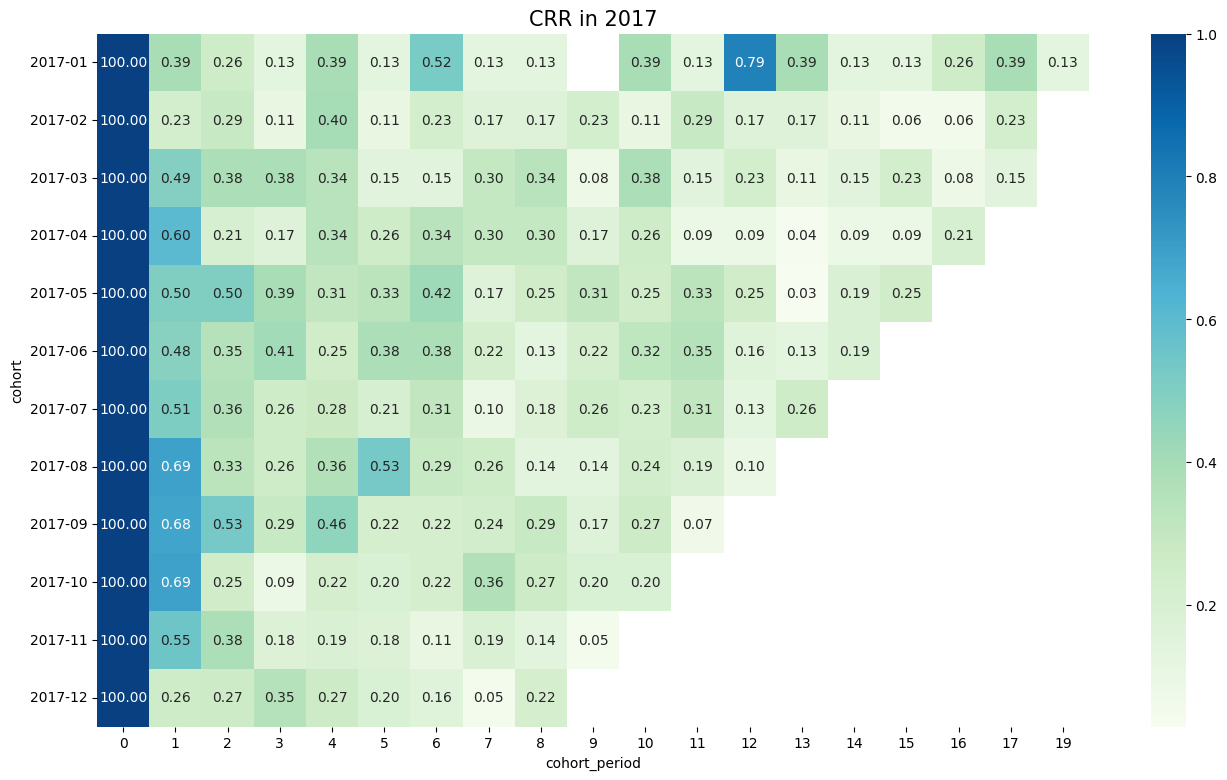

In [ ]:
#визуализируем
plt.figure(figsize=(16,9))
ax = sns.heatmap(cohort_analysis, vmax=1, annot=True, fmt='.2f', cmap='GnBu')
plt.title('CRR in 2017', size= 15)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

На графике видно, что самый высокий retention на 3-ий месяц у когорты, совершившей первую покупку в июне 2017. Retention равен 0,41%